<a href="https://colab.research.google.com/github/jderazoa/ML-con-PYTHON/blob/master/riesgo_de_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/default of credit card clients.xls


In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import pandas as pd
import os

print(os.getcwd())

path_data = os.path.join("..", "input","default of credit card clients.xls")
df = pd.read_excel(path_data, header=1, index_col=0).rename(columns={"PAY_0": "PAY_1"})

/kaggle/working


In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df[df.index.duplicated()]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,


# Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df["LIMIT_BAL_log"] = np.log10(df.LIMIT_BAL)

In [ ]:
df[[ 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6' ]].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [ ]:
default = df[df["default payment next month"] == 1]
no_default = df[df["default payment next month"] == 0]
print(len(df), len(default), len(no_default))

30000 6636 23364


In [ ]:
print(len(default)/len(df), len(no_default)/ len(df),)

0.2212 0.7788


In [ ]:
df.keys()

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'LIMIT_BAL_log'],
      dtype='object')

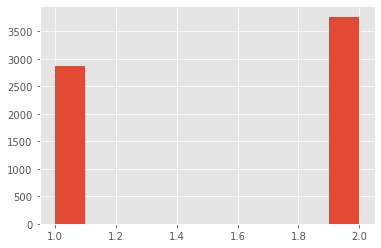

In [ ]:
default["SEX"].hist()

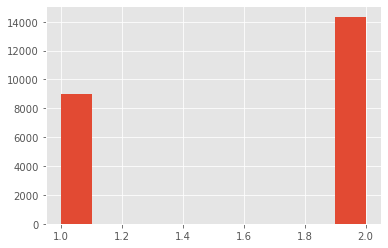

In [ ]:
no_default["SEX"].hist()

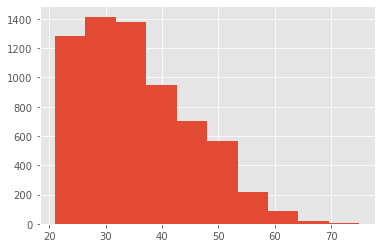

In [ ]:
default["AGE"].hist()

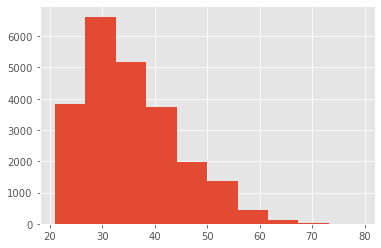

In [ ]:
no_default["AGE"].hist()

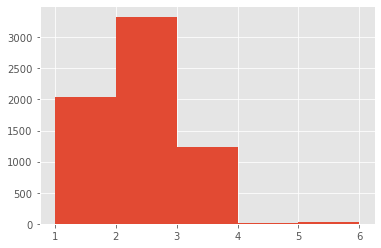

In [ ]:
default["EDUCATION"].hist(bins=range(1,7))

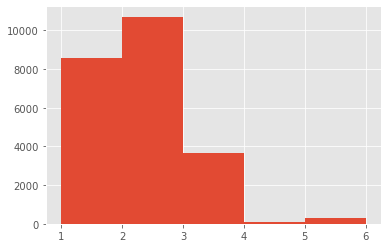

In [ ]:
no_default["EDUCATION"].hist(bins=range(1,7))

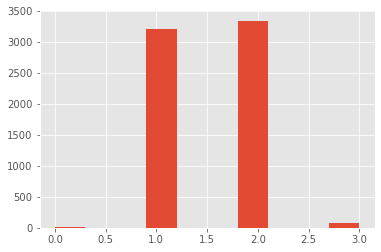

In [ ]:
default["MARRIAGE"].hist()

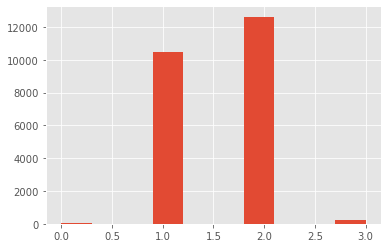

In [ ]:
no_default["MARRIAGE"].hist()

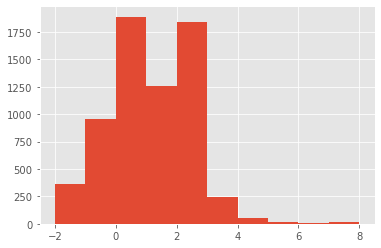

In [ ]:
default["PAY_1"].hist(bins=range(-2,9))

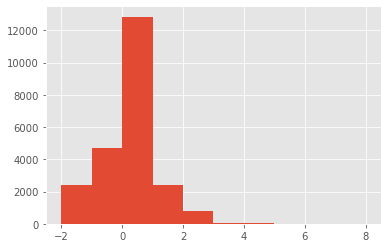

In [ ]:
no_default["PAY_1"].hist(bins=range(-2,9))

In [ ]:
df[np.isnan(df.LIMIT_BAL_log)]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,LIMIT_BAL_log
ID,,,,,,,,,,,,,,,,,,,,,


In [ ]:
df.LIMIT_BAL_log.describe()

count    30000.000000
mean         5.065177
std          0.408730
min          4.000000
25%          4.698970
50%          5.146128
75%          5.380211
max          6.000000
Name: LIMIT_BAL_log, dtype: float64

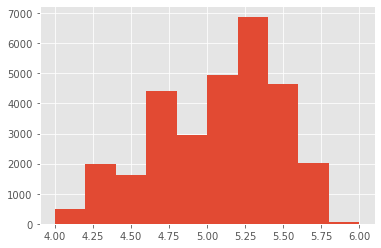

In [ ]:
df.LIMIT_BAL_log.hist()

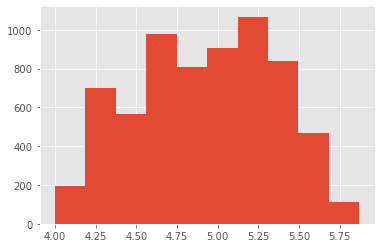

In [ ]:
default.LIMIT_BAL_log.hist()

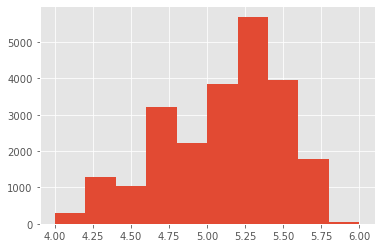

In [ ]:
no_default.LIMIT_BAL_log.hist()

In [ ]:
df.keys()

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'LIMIT_BAL_log'],
      dtype='object')

In [ ]:
# Transformaciones

df["BILL_AMT1_P"] = df["BILL_AMT1"] / df["LIMIT_BAL"]
df["BILL_AMT2_P"] = df["BILL_AMT2"] / df["LIMIT_BAL"]
df["BILL_AMT3_P"] = df["BILL_AMT3"] / df["LIMIT_BAL"]
df["BILL_AMT4_P"] = df["BILL_AMT4"] / df["LIMIT_BAL"]
df["BILL_AMT5_P"] = df["BILL_AMT5"] / df["LIMIT_BAL"]
df["BILL_AMT6_P"] = df["BILL_AMT6"] / df["LIMIT_BAL"]

delta = 60.5
p_l1 = (((df["PAY_AMT1"] + delta) / (df["BILL_AMT1"] + delta) + 1) - abs((df["PAY_AMT1"] + delta) / (df["BILL_AMT1"] + delta) - 1)) / 2
p_l2 = (((df["PAY_AMT2"] + delta) / (df["BILL_AMT2"] + delta) + 1) - abs((df["PAY_AMT2"] + delta) / (df["BILL_AMT2"] + delta) - 1)) / 2
p_l3 = (((df["PAY_AMT3"] + delta) / (df["BILL_AMT3"] + delta) + 1) - abs((df["PAY_AMT3"] + delta) / (df["BILL_AMT3"] + delta) - 1)) / 2
p_l4 = (((df["PAY_AMT4"] + delta) / (df["BILL_AMT4"] + delta) + 1) - abs((df["PAY_AMT4"] + delta) / (df["BILL_AMT4"] + delta) - 1)) / 2
p_l5 = (((df["PAY_AMT5"] + delta) / (df["BILL_AMT5"] + delta) + 1) - abs((df["PAY_AMT5"] + delta) / (df["BILL_AMT5"] + delta) - 1)) / 2
p_l6 = (((df["PAY_AMT6"] + delta) / (df["BILL_AMT6"] + delta) + 1) - abs((df["PAY_AMT6"] + delta) / (df["BILL_AMT6"] + delta) - 1)) / 2

df["PAY_AMT1_P"] = ((p_l1 - 1) + abs(p_l1 + 1)) / 2
df["PAY_AMT2_P"] = ((p_l2 - 1) + abs(p_l2 + 1)) / 2
df["PAY_AMT3_P"] = ((p_l3 - 1) + abs(p_l3 + 1)) / 2
df["PAY_AMT4_P"] = ((p_l4 - 1) + abs(p_l4 + 1)) / 2
df["PAY_AMT5_P"] = ((p_l5 - 1) + abs(p_l5 + 1)) / 2
df["PAY_AMT6_P"] = ((p_l6 - 1) + abs(p_l6 + 1)) / 2

df["DELTA_PAY_AMT1_P"] = df["PAY_AMT1_P"] - df["PAY_AMT2_P"]
df["DELTA_PAY_AMT2_P"] = df["PAY_AMT2_P"] - df["PAY_AMT3_P"]
df["DELTA_PAY_AMT3_P"] = df["PAY_AMT3_P"] - df["PAY_AMT4_P"]
df["DELTA_PAY_AMT4_P"] = df["PAY_AMT4_P"] - df["PAY_AMT5_P"]
df["DELTA_PAY_AMT5_P"] = df["PAY_AMT5_P"] - df["PAY_AMT6_P"]

df["DELTA_BILL_AMT1_P"] = df["BILL_AMT1_P"] - df["BILL_AMT2_P"]
df["DELTA_BILL_AMT2_P"] = df["BILL_AMT2_P"] - df["BILL_AMT3_P"]
df["DELTA_BILL_AMT3_P"] = df["BILL_AMT3_P"] - df["BILL_AMT4_P"]
df["DELTA_BILL_AMT4_P"] = df["BILL_AMT4_P"] - df["BILL_AMT5_P"]
df["DELTA_BILL_AMT5_P"] = df["BILL_AMT5_P"] - df["BILL_AMT6_P"]

In [ ]:
df[["BILL_AMT1_P", "BILL_AMT2_P", "BILL_AMT3_P", "BILL_AMT4_P", "BILL_AMT5_P", "BILL_AMT6_P"]].describe()

,BILL_AMT1_P,BILL_AMT2_P,BILL_AMT3_P,BILL_AMT4_P,BILL_AMT5_P,BILL_AMT6_P
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.423771,0.411128,0.392192,0.359503,0.333108,0.318585
std,0.411462,0.404555,0.396449,0.368686,0.350542,0.345301
min,-0.619892,-1.395540,-1.025100,-1.374500,-0.876743,-1.509530
25%,0.022032,0.018318,0.016030,0.014299,0.011133,0.007800
50%,0.313994,0.296057,0.273135,0.242066,0.212026,0.185224
75%,0.829843,0.806500,0.755107,0.667937,0.602245,0.582169
max,6.455300,6.380500,10.688575,5.146850,4.935500,3.885550


In [ ]:
df[["PAY_AMT1_P", "PAY_AMT2_P", "PAY_AMT3_P", "PAY_AMT4_P", "PAY_AMT5_P", "PAY_AMT6_P"]].describe()

,PAY_AMT1_P,PAY_AMT2_P,PAY_AMT3_P,PAY_AMT4_P,PAY_AMT5_P,PAY_AMT6_P
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.301166,0.311261,0.306474,0.302895,0.324475,0.342576
std,0.403062,0.414413,0.418354,0.421187,0.427829,0.439090
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.040646,0.040015,0.035482,0.035283,0.037715,0.037610
50%,0.077780,0.077864,0.065307,0.057509,0.064824,0.069413
75%,0.561109,0.678981,0.706234,0.704504,0.941226,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


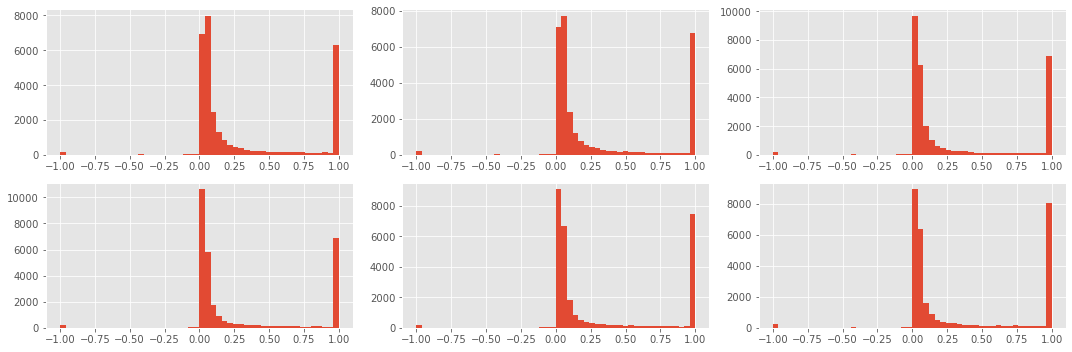

In [ ]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2,3, figsize=(15, 5))

df.PAY_AMT1_P.hist(ax=ax1, bins=50)
df.PAY_AMT2_P.hist(ax=ax2, bins=50)
df.PAY_AMT3_P.hist(ax=ax3, bins=50)
df.PAY_AMT4_P.hist(ax=ax4, bins=50)
df.PAY_AMT5_P.hist(ax=ax5, bins=50)
df.PAY_AMT6_P.hist(ax=ax6, bins=50)

plt.tight_layout()

In [ ]:
df[df.PAY_AMT1_P > 10000][["PAY_AMT1_P", "PAY_AMT1", "BILL_AMT1"]]

,PAY_AMT1_P,PAY_AMT1,BILL_AMT1
ID,,,


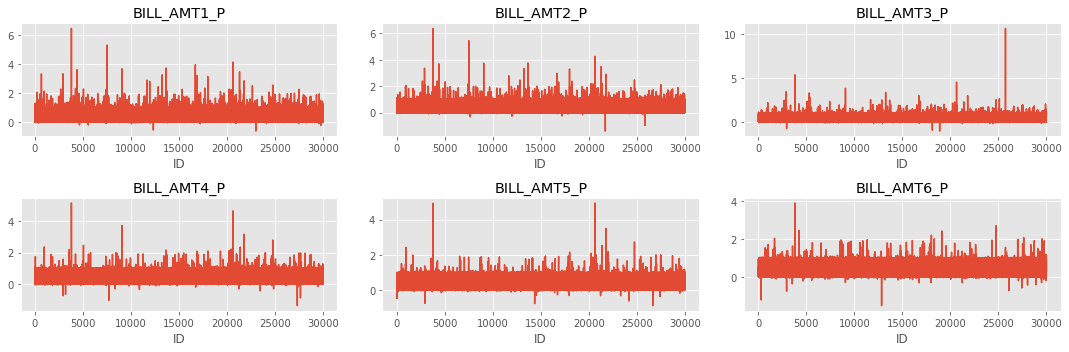

In [ ]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2,3, figsize=(15, 5))

df.BILL_AMT1_P.plot(ax=ax1, title="BILL_AMT1_P")
df.BILL_AMT2_P.plot(ax=ax2, title="BILL_AMT2_P")
df.BILL_AMT3_P.plot(ax=ax3, title="BILL_AMT3_P")
df.BILL_AMT4_P.plot(ax=ax4, title="BILL_AMT4_P")
df.BILL_AMT5_P.plot(ax=ax5, title="BILL_AMT5_P")
df.BILL_AMT6_P.plot(ax=ax6, title="BILL_AMT6_P")

plt.tight_layout()

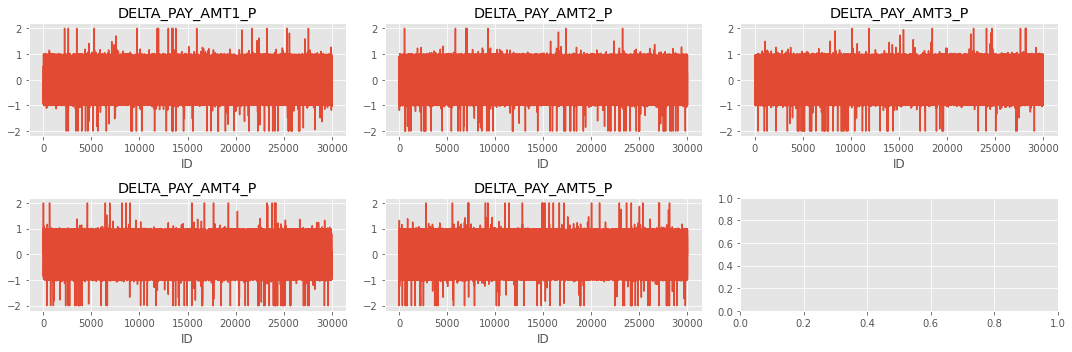

In [ ]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2,3, figsize=(15, 5))

df.DELTA_PAY_AMT1_P.plot(ax=ax1, title="DELTA_PAY_AMT1_P")
df.DELTA_PAY_AMT2_P.plot(ax=ax2, title="DELTA_PAY_AMT2_P")
df.DELTA_PAY_AMT3_P.plot(ax=ax3, title="DELTA_PAY_AMT3_P")
df.DELTA_PAY_AMT4_P.plot(ax=ax4, title="DELTA_PAY_AMT4_P")
df.DELTA_PAY_AMT5_P.plot(ax=ax5, title="DELTA_PAY_AMT5_P")

plt.tight_layout()

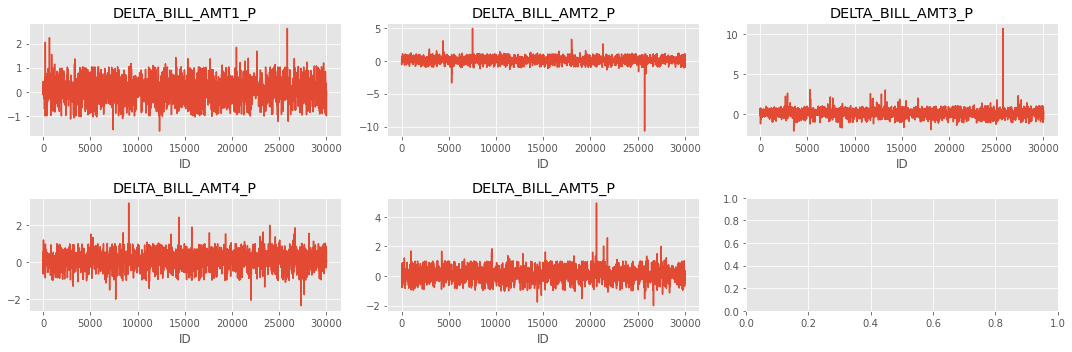

In [ ]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2,3, figsize=(15, 5))

df.DELTA_BILL_AMT1_P.plot(ax=ax1, title="DELTA_BILL_AMT1_P")
df.DELTA_BILL_AMT2_P.plot(ax=ax2, title="DELTA_BILL_AMT2_P")
df.DELTA_BILL_AMT3_P.plot(ax=ax3, title="DELTA_BILL_AMT3_P")
df.DELTA_BILL_AMT4_P.plot(ax=ax4, title="DELTA_BILL_AMT4_P")
df.DELTA_BILL_AMT5_P.plot(ax=ax5, title="DELTA_BILL_AMT5_P")

plt.tight_layout()

In [ ]:
def balance_log_buckets(limit_bill, f=1./2):
    centroides = [4, 4.5, 5, 5.5, 6]
    bk = np.array([np.exp(-1 * abs(limit_bill[0] - c) * f) for c in centroides])
    bk_n = bk / bk.sum() # Escala manual
    return bk_n

In [ ]:
def age_buckets(age, f=1./10):
    centroides = [20, 30, 40, 50, 60, 70]
    bk = np.array([np.exp(-1 * abs(age[0] - c) * f) for c in centroides])
    bk_n = bk / bk.sum() # Escala manual
    return bk_n

In [ ]:
v = np.vectorize(balance_log_buckets, signature="(1)->(5)",)
v(np.array([[4], [5.3]]))

array([[0.31002201, 0.24144538, 0.18803785, 0.14644403, 0.11405072],
       [0.14253423, 0.18301758, 0.23499922, 0.24704789, 0.19240109]])

In [ ]:
df.keys()

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'LIMIT_BAL_log', 'BILL_AMT1_P',
       'BILL_AMT2_P', 'BILL_AMT3_P', 'BILL_AMT4_P', 'BILL_AMT5_P',
       'BILL_AMT6_P', 'PAY_AMT1_P', 'PAY_AMT2_P', 'PAY_AMT3_P', 'PAY_AMT4_P',
       'PAY_AMT5_P', 'PAY_AMT6_P', 'DELTA_PAY_AMT1_P', 'DELTA_PAY_AMT2_P',
       'DELTA_PAY_AMT3_P', 'DELTA_PAY_AMT4_P', 'DELTA_PAY_AMT5_P',
       'DELTA_BILL_AMT1_P', 'DELTA_BILL_AMT2_P', 'DELTA_BILL_AMT3_P',
       'DELTA_BILL_AMT4_P', 'DELTA_BILL_AMT5_P'],
      dtype='object')

In [ ]:
cols = ['LIMIT_BAL_log', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
        'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
        'BILL_AMT1_P', 'BILL_AMT2_P', 'BILL_AMT3_P', 'BILL_AMT4_P', 'BILL_AMT5_P', 'BILL_AMT6_P', 
        'PAY_AMT1_P', 'PAY_AMT2_P', 'PAY_AMT3_P', 'PAY_AMT4_P', 'PAY_AMT5_P', 'PAY_AMT6_P', 
        'DELTA_PAY_AMT1_P', 'DELTA_PAY_AMT2_P', 'DELTA_PAY_AMT3_P', 'DELTA_PAY_AMT4_P', 'DELTA_PAY_AMT5_P',
        'DELTA_BILL_AMT1_P', 'DELTA_BILL_AMT2_P', 'DELTA_BILL_AMT3_P', 'DELTA_BILL_AMT4_P', 'DELTA_BILL_AMT5_P']

In [ ]:
len(cols)

33

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

limit_bill_transformer = FunctionTransformer(np.vectorize(balance_log_buckets, signature="(1)->(5)"))
age_transformer = FunctionTransformer(np.vectorize(age_buckets, signature="(1)->(6)"))
indentity_transformer = FunctionTransformer(np.vectorize(lambda x: x))



ct = ColumnTransformer([("LimitBillTransformer", limit_bill_transformer , [0]),
                        ("SexTransformer", OneHotEncoder(), [1]),
                        ("EducationTransformer", OneHotEncoder(), [2]),
                        ("MarriageTransformer", OneHotEncoder(),  [3]),
                        ("AgeTransformer", age_transformer, [4]),
                        
                        ("Pay1Transformer", indentity_transformer, [5]),
                        ("Pay2Transformer", indentity_transformer, [6]),
                        ("Pay3Transformer", indentity_transformer, [7]),
                        ("Pay4Transformer", indentity_transformer, [8]),
                        ("Pay5Transformer", indentity_transformer, [9]),
                        ("Pay6Transformer", indentity_transformer, [10]),
                        
                        ("BillAmountP1Transformer", indentity_transformer, [11]),
                        ("BillAmountP2Transformer", indentity_transformer, [12]),
                        ("BillAmountP3Transformer", indentity_transformer, [13]),
                        ("BillAmountP4Transformer", indentity_transformer, [14]),
                        ("BillAmountP5Transformer", indentity_transformer, [15]),
                        ("BillAmountP6Transformer", indentity_transformer, [16]),
                        
                        ("PayAmountP1Transformer", indentity_transformer, [17]),
                        ("PayAmountP2Transformer", indentity_transformer, [18]),
                        ("PayAmountP3Transformer", indentity_transformer, [19]),
                        ("PayAmountP4Transformer", indentity_transformer, [20]),
                        ("PayAmountP5Transformer", indentity_transformer, [21]),
                        ("PayAmountP6Transformer", indentity_transformer, [22]),

                        ("BillDeltaP1Transformer", indentity_transformer, [23]),
                        ("BillDeltaP2Transformer", indentity_transformer, [24]),
                        ("BillDeltaP3Transformer", indentity_transformer, [25]),
                        ("BillDeltaP4Transformer", indentity_transformer, [26]),
                        ("BillDeltaP5Transformer", indentity_transformer, [27]),
                        
                        ("PayDeltatP1Transformer", indentity_transformer, [28]),
                        ("PayDeltatP2Transformer", indentity_transformer, [29]),
                        ("PayDeltatP3Transformer", indentity_transformer, [30]),
                        ("PayDeltatP4Transformer", indentity_transformer, [31]),
                        ("PayDeltatP5Transformer", indentity_transformer, [32]),
                       ], remainder="passthrough")

In [ ]:
from sklearn.utils import resample


def re_sample_x_y(X, y, n_samples, label_resample=1,): 
    
    X_y_train = np.concatenate([X, np.array([y]).T], axis=1)
    X_y_pos = X_y_train[X_y_train[:,-1] == label_resample]
    X_y_neg = X_y_train[X_y_train[:,-1] != label_resample]
    X_y_pos_resample = resample(X_y_pos, n_samples=n_samples) 
    X_y_ = np.concatenate([X_y_pos_resample, X_y_neg])            
    
    X_ = X_y_[:,:-1]
    y_ = X_y_[:,-1].astype(int)

    return X_, y_

In [ ]:
positivos = df[df["default payment next month"] == 1]
negativos = df[df["default payment next month"] == 0] 
len(positivos)/len(df), len(negativos)/len(df)

(0.2212, 0.7788)

In [ ]:
int(len(negativos) / ( (1 / 0.8) - 1))

93456

In [ ]:
def resample_df(dataframe, n_sample, x_cols=cols, y_cols="default payment next month", pos_label=1):
    
    df_train_pos = dataframe[dataframe[y_cols] == pos_label]
    df_train_neg = dataframe[dataframe[y_cols] != pos_label]
    
    df_train_pos_resample = df_train_pos.sample(n_sample, replace=True)
    df_resample = pd.concat([df_train_pos_resample, df_train_neg], axis=0).sample(frac=1)
    
    X_ = df_resample[x_cols].values
    y_ = df_resample[y_cols].values
    
    return X_,y_

In [ ]:
X = df[cols].values
y = df["default payment next month"].values

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.33)

In [ ]:
# X_train = df_train[cols].values
# y_train = df_train["default payment next month"].values

In [ ]:
X_train, y_train = resample_df(df_train, 93456)

In [ ]:
len(y_train[y_train == 1])

93456

In [ ]:
X_test = df_test[cols].values
y_test = df_test["default payment next month"].values

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, StandardScaler

pca = PCA(n_components=30)
csf_MLPC = MLPClassifier(hidden_layer_sizes=(100,))

piper = Pipeline([("transformer", ct), ("scaler", StandardScaler()), ("csf", csf_MLPC)])

In [ ]:
piper.fit(X_train, y_train)    

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('LimitBillTransformer',
                                                  FunctionTransformer(func=<numpy.vectorize object at 0x7f014d7609d0>),
                                                  [0]),
                                                 ('SexTransformer',
                                                  OneHotEncoder(), [1]),
                                                 ('EducationTransformer',
                                                  OneHotEncoder(), [2]),
                                                 ('MarriageTransformer',
                                                  OneHotEncoder(), [3]),
                                                 ('AgeTransformer',
                                                  FunctionTransformer(fu...
                                                 ('BillDeltaP5Transformer',
    

In [ ]:
score_train = piper.score(X_train, y_train)
score_test = piper.score(X_test, y_test)
print("score train: {}, socre test: {}".format(score_train, score_test))

score train: 0.9476429232701175, socre test: 0.6245454545454545


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, StandardScaler

pca = PCA(n_components=30)
csf_DTC = DecisionTreeClassifier(max_depth=3)
clf_ABC = AdaBoostClassifier(csf_DTC)

piper2 = Pipeline([("transformer", ct), ("scaler", StandardScaler()), ("csf", clf_ABC)])

In [ ]:
piper2.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('LimitBillTransformer',
                                                  FunctionTransformer(func=<numpy.vectorize object at 0x7f014d7609d0>),
                                                  [0]),
                                                 ('SexTransformer',
                                                  OneHotEncoder(), [1]),
                                                 ('EducationTransformer',
                                                  OneHotEncoder(), [2]),
                                                 ('MarriageTransformer',
                                                  OneHotEncoder(), [3]),
                                                 ('AgeTransformer',
                                                  FunctionTransformer(fu...
                                                  FunctionTransformer(func=<nump

In [ ]:
score_train = piper2.score(X_train, y_train)
score_test = piper2.score(X_test, y_test)
print("score train: {}, socre test: {}".format(score_train, score_test))

score train: 0.8852672392458087, socre test: 0.38737373737373737


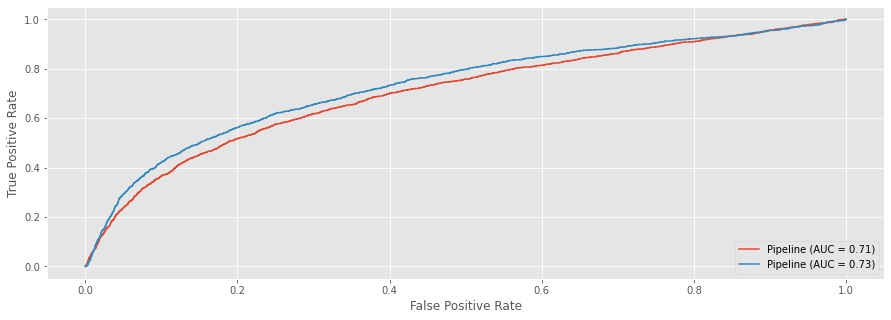

In [ ]:
from sklearn import metrics

fig, ax = plt.subplots(1, figsize=(15,5))
metrics.plot_roc_curve(piper, X_test, y_test, ax=ax)
metrics.plot_roc_curve(piper2, X_test, y_test, ax=ax)

In [ ]:
piper2.named_steps.csf.estimators_

[DecisionTreeClassifier(max_depth=3, random_state=426462258),
 DecisionTreeClassifier(max_depth=3, random_state=523179858),
 DecisionTreeClassifier(max_depth=3, random_state=950786734),
 DecisionTreeClassifier(max_depth=3, random_state=78190716),
 DecisionTreeClassifier(max_depth=3, random_state=146650800),
 DecisionTreeClassifier(max_depth=3, random_state=1461921538),
 DecisionTreeClassifier(max_depth=3, random_state=375145970),
 DecisionTreeClassifier(max_depth=3, random_state=742012232),
 DecisionTreeClassifier(max_depth=3, random_state=1201508713),
 DecisionTreeClassifier(max_depth=3, random_state=105799410),
 DecisionTreeClassifier(max_depth=3, random_state=664959719),
 DecisionTreeClassifier(max_depth=3, random_state=162323301),
 DecisionTreeClassifier(max_depth=3, random_state=1029173822),
 DecisionTreeClassifier(max_depth=3, random_state=119339622),
 DecisionTreeClassifier(max_depth=3, random_state=1180987979),
 DecisionTreeClassifier(max_depth=3, random_state=1537053415),
 Dec

[Text(418.5, 237.82500000000002, 'X[24] <= -0.022\ngini = 0.246\nsamples = 109097\nvalue = [0.143, 0.857]'),
 Text(209.25, 169.875, 'X[3] <= -0.524\ngini = 0.352\nsamples = 58809\nvalue = [0.123, 0.416]'),
 Text(104.625, 101.92500000000001, 'X[51] <= 7.448\ngini = 0.269\nsamples = 19319\nvalue = [0.028, 0.149]'),
 Text(52.3125, 33.974999999999994, 'gini = 0.267\nsamples = 19288\nvalue = [0.028, 0.149]'),
 Text(156.9375, 33.974999999999994, 'gini = 0.0\nsamples = 31\nvalue = [0.0, 0.0]'),
 Text(313.875, 101.92500000000001, 'X[30] <= -1.087\ngini = 0.386\nsamples = 39490\nvalue = [0.095, 0.267]'),
 Text(261.5625, 33.974999999999994, 'gini = 0.297\nsamples = 15151\nvalue = [0.025, 0.114]'),
 Text(366.1875, 33.974999999999994, 'gini = 0.429\nsamples = 24339\nvalue = [0.069, 0.154]'),
 Text(627.75, 169.875, 'X[24] <= 0.711\ngini = 0.085\nsamples = 50288\nvalue = [0.02, 0.441]'),
 Text(523.125, 101.92500000000001, 'X[25] <= 0.796\ngini = 0.153\nsamples = 19300\nvalue = [0.015, 0.162]'),
 Tex

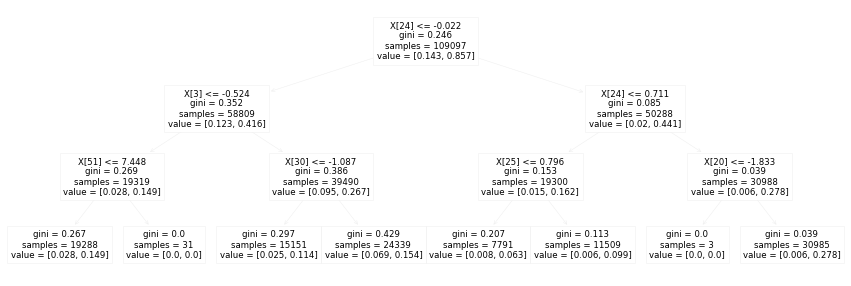

In [ ]:
from sklearn import tree

fig, ax = plt.subplots(1, figsize=(15,5))
tree.plot_tree(piper2.named_steps.csf.estimators_[0], ax=ax) 

In [ ]:
from sklearn.tree import export_text

r = export_text(piper2.named_steps.csf.estimators_[1])
print(r)

|--- feature_28 <= 0.64
|   |--- feature_34 <= -1.03
|   |   |--- feature_44 <= 0.12
|   |   |   |--- class: 1
|   |   |--- feature_44 >  0.12
|   |   |   |--- class: 0
|   |--- feature_34 >  -1.03
|   |   |--- feature_31 <= 0.66
|   |   |   |--- class: 0
|   |   |--- feature_31 >  0.66
|   |   |   |--- class: 1
|--- feature_28 >  0.64
|   |--- feature_24 <= -0.02
|   |   |--- feature_49 <= 0.39
|   |   |   |--- class: 1
|   |   |--- feature_49 >  0.39
|   |   |   |--- class: 0
|   |--- feature_24 >  -0.02
|   |   |--- feature_48 <= 0.04
|   |   |   |--- class: 1
|   |   |--- feature_48 >  0.04
|   |   |   |--- class: 0



In [ ]:
piper2.named_steps.csf.estimator_weights_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
piper2.named_steps.csf.estimator_errors_

array([0.14305618, 0.4255728 , 0.45814483, 0.46701345, 0.46918392,
       0.47473672, 0.47198106, 0.48640675, 0.48360351, 0.49012479,
       0.48384473, 0.49009846, 0.47555527, 0.48771329, 0.4933475 ,
       0.49241576, 0.49761885, 0.49350583, 0.4751483 , 0.48523747,
       0.47810425, 0.48516612, 0.48144811, 0.47652361, 0.47240308,
       0.48544792, 0.48417918, 0.4769987 , 0.49079342, 0.49804054,
       0.498609  , 0.49071879, 0.49239199, 0.4870622 , 0.48433683,
       0.4937071 , 0.48446846, 0.48581826, 0.49509777, 0.49683755,
       0.49149628, 0.48834284, 0.49885673, 0.49272762, 0.49584735,
       0.48391421, 0.48255884, 0.48039418, 0.49046816, 0.48976359])

In [ ]:
len_positives = [int(len(negativos) / ( (1 / p) - 1)) for p in [0.3, 0.4, 0.5, 0.8]]
len_positives

[10013, 15576, 23364, 93456]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

info_fit = list()


for i, n_pos_samples in enumerate(len_positives):
    
    df_train, df_test = train_test_split(df, test_size=0.33)
    
    X_train, y_train = resample_df(df_train, n_pos_samples)
    
    X_test = df_test[cols].values
    y_test = df_test["default payment next month"].values
    
    piper.fit(X_train, y_train)
    
    score_train = piper.score(X_train, y_train)
    
    score_test = piper.score(X_test, y_test)
    
    y_predict = piper.predict(X_test)
    
    cm = confusion_matrix(y_test, y_predict, labels=[0,1])
    
    scores_proba = piper.predict_proba(X_test)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, scores_proba[:,1], pos_label=1)
    
    info_fit.append({"score_train": score_train, "score_test": score_test, "confusion_matrix": cm, "roc_curve": (fpr, tpr, thresholds)})
    
    print("iter done: {}, score train: {}, score test: {}".format(i,score_train,score_test))       

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iter done: 0, score train: 0.840957840957841, score test: 0.7655555555555555


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iter done: 1, score train: 0.8404432487829875, score test: 0.7254545454545455


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iter done: 2, score train: 0.8551731207873088, score test: 0.6763636363636364


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iter done: 3, score train: 0.9447010097678084, score test: 0.6163636363636363


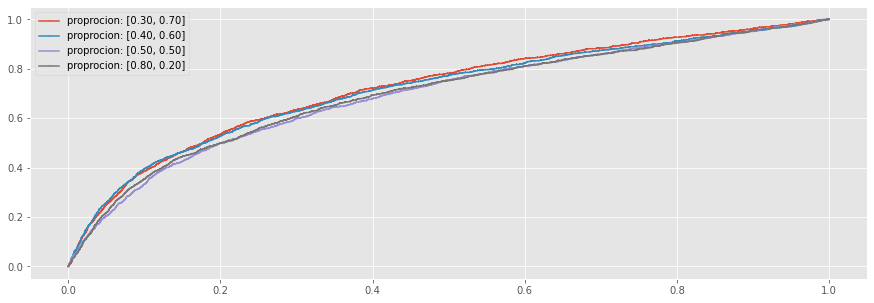

In [ ]:
fig,ax = plt.subplots(1, figsize=(15,5))
ax.plot(info_fit[0]["roc_curve"][0], info_fit[0]["roc_curve"][1], label="proprocion: [0.30, 0.70]", marker=",", )
ax.plot(info_fit[1]["roc_curve"][0], info_fit[1]["roc_curve"][1], label="proprocion: [0.40, 0.60]", marker=",", )
ax.plot(info_fit[2]["roc_curve"][0], info_fit[2]["roc_curve"][1], label="proprocion: [0.50, 0.50]", marker=",", )
ax.plot(info_fit[3]["roc_curve"][0], info_fit[3]["roc_curve"][1], label="proprocion: [0.80, 0.20]", marker=",",)
plt.legend()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

info_fit2 = list()


for i, n_pos_samples in enumerate(len_positives):
    
    df_train, df_test = train_test_split(df, test_size=0.33)
    
    X_train, y_train = resample_df(df_train, n_pos_samples)
    
    X_test = df_test[cols].values
    y_test = df_test["default payment next month"].values
    
    piper2.fit(X_train, y_train)
    
    score_train = piper2.score(X_train, y_train)
    
    score_test = piper2.score(X_test, y_test)
    
    y_predict = piper2.predict(X_test)
    
    cm = confusion_matrix(y_test, y_predict, labels=[0,1])
    
    scores_proba = piper2.predict_proba(X_test)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, scores_proba[:,1], pos_label=1)
    
    info_fit2.append({"score_train": score_train, "score_test": score_test, "confusion_matrix": cm, "roc_curve": (fpr, tpr, thresholds)})
    
    print("iter done: {}, score train: {}, score test: {}".format(i,score_train,score_test))    

iter done: 0, score train: 0.7851413441320769, score test: 0.7683838383838384
iter done: 1, score train: 0.7758328808253745, score test: 0.7284848484848485
iter done: 2, score train: 0.7762773535591657, score test: 0.6690909090909091
iter done: 3, score train: 0.8845808520384791, score test: 0.40474747474747474


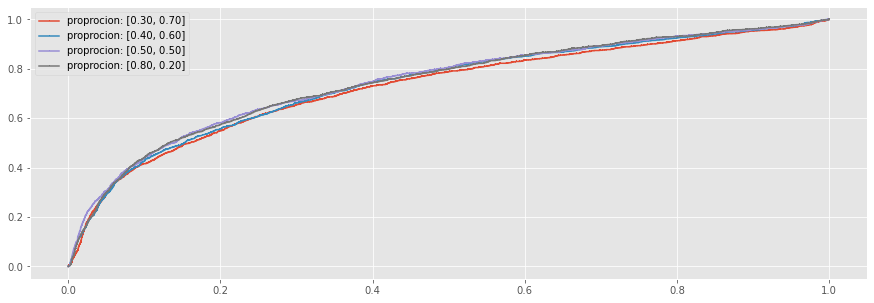

In [ ]:
fig,ax = plt.subplots(1, figsize=(15,5))
ax.plot(info_fit2[0]["roc_curve"][0], info_fit2[0]["roc_curve"][1], label="proprocion: [0.30, 0.70]", marker=",", )
ax.plot(info_fit2[1]["roc_curve"][0], info_fit2[1]["roc_curve"][1], label="proprocion: [0.40, 0.60]", marker=",", )
ax.plot(info_fit2[2]["roc_curve"][0], info_fit2[2]["roc_curve"][1], label="proprocion: [0.50, 0.50]", marker=",", )
ax.plot(info_fit2[3]["roc_curve"][0], info_fit2[3]["roc_curve"][1], label="proprocion: [0.80, 0.20]", marker=",",)
plt.legend()